# Quelques traitements de base sur le jeu de données

##  Import des librairies

Nous utiliserons principalement `pandas`, afin de stocker nos données de manière efficace, et `matplotlib`, qui nous permettra de dessiner nos trajectoires.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from IPython.display import display, HTML

## Stockage des données dans une Dataframe
Voici à quoi ressemble le jeu de données en notre possession.
Nous nous interesserons qu'aux colonnes `Trajectory`, `X` et `Y`
Importons une partie de ces données (les 100 premières trajectoires) vers une Dataframe (pandas) afin de faciliter par la suite la selection des données

In [2]:
file = open("Data/Example.txt", "r")
file.readline() # on ignore la première ligne
X, Y, id_traj_from_file = [], [], []
for line in file:
    data = re.split('\s', line)
    id_traj_from_file.append(int(data[0]))
    X.append(float(data[2]))
    Y.append(float(data[3]))
df = pd.DataFrame(
    {
        "id": id_traj_from_file,
        "X": X,
        "Y": Y
    }
)
df.head()

,X,Y,id
0,-402.0,-131.0,1
1,-403.0,-131.0,1
2,-404.0,-131.0,1
3,-405.0,-131.0,1
4,-405.0,-130.0,1


## Traitements sur des Dataframes
L'un des principaux avantages de Pandas est la possibilité de selectionner certaines données en fonctions de critères voulues (e.g. numéro de ligne, sélection de colonnes...)

In [3]:
df['X'].head()

0   -402.0
1   -403.0
2   -404.0
3   -405.0
4   -405.0
Name: X, dtype: float64

In [4]:
df_1 = df.loc[df['id'] == 1] # id_trajectoire = 1
df_1[['X', 'Y']].head() # colonnes X et Y

,X,Y
0,-402.0,-131.0
1,-403.0,-131.0
2,-404.0,-131.0
3,-405.0,-131.0
4,-405.0,-130.0


## Affichons la première trajectoire sur plot

In [5]:
def show(df):
    plt.plot(df['X'], df['Y'], 'r')

    min_x = min(df['X'])
    max_x = max(df['X'])

    min_y = min(df['Y'])
    max_y = max(df['Y'])
    plt.axis([min_x - 20, max_x + 20, min_y - 20, max_y + 20])
    return plt

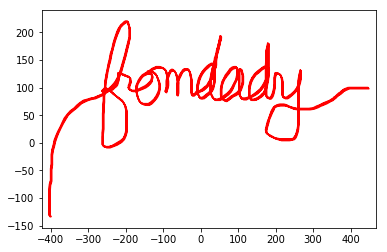

In [6]:
plt = show(df_1)

## Etudes des trajectoires

Il existe deux types de trajectoires dans le jeu de données : le premier est une trajectoire de référence (généralement une ligne droite, légerement incurvée), et le deuxième une contenant des erreurs/bruits.

### Une tranjectoire sans erreur...

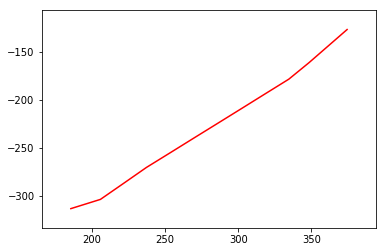

In [7]:
df_ref = df.loc[df['id'] == 32]
plt = show(df_ref)

### ... et une autre avec

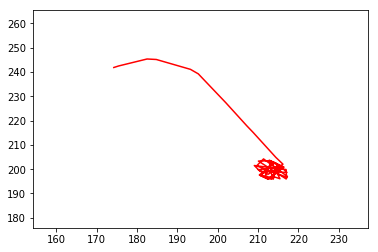

In [8]:
df_err = df.loc[df['id'] == 30]
plt = show(df_err)

##### Conclusion
Notre but est donc de trouber un moyen de reconnaître de manière efficace ces erreurs, tout en essayant de les corriger et de les nettoyer.